# Swindon Earnings

This script was written to provide easy interpretation of earning statistics for Swindon. It has been initialised to load the data available [here](https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/methodologies/annualsurveyofhoursandearningslowpayandannualsurveyofhoursandearningspensionresultsqmi) The link allows an excel file to be downloaded.

I make no claim that this script is overly efficient, it was made for personal interest.

Any questions please contact:
> Andrew Paul Barnes<br>
> Doctoral Student & Teaching Assistant<br>
> Department of Architecture and Civil Engineering<br>
> University of Bath<br>
> a.p.barnes@bath.ac.uk

## Libraries

To begin several libraries are imported to allow easy manipulation of the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from scipy.stats import linregress
from matplotlib.lines import Line2D

## Loading Data Required

First we load the data from the file indicated by the *MASTER_FILE* variable.

In [45]:
MASTER_FILE = "2019.csv"

In [46]:
earnings_data = pd.read_csv(MASTER_FILE, delimiter=',')

In [47]:
earnings_data

,Geography,AveragesAndPercentiles,Sex,WorkingPattern,HoursAndEarnings,Year,Figure
0,Swindon,Mean,All,All,Annual pay - Gross,2019,29584.00
1,Swindon,Mean,All,All,Hourly pay - Gross,2019,16.49
2,Swindon,Mean,All,All,Paid hours worked - Basic,2019,33.40
3,Swindon,Mean,All,All,Paid hours worked - Overtime,2019,1.10
4,Swindon,Mean,All,All,Paid hours worked - Total,2019,34.50
5,Swindon,Mean,All,All,Weekly pay - Gross,2019,568.90
6,Swindon,Mean,All,Full-Time,Annual pay - Gross,2019,34453.00
7,Swindon,Mean,All,Full-Time,Hourly pay - Gross,2019,17.13
8,Swindon,Mean,All,Full-Time,Paid hours worked - Basic,2019,38.00
9,Swindon,Mean,All,Full-Time,Paid hours worked - Overtime,2019,1.20


## Overview

To begin we look at the annual earnings for both full and part-time employees through time.

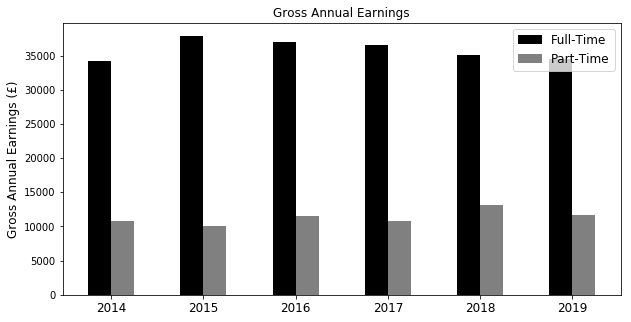

In [48]:
fig, all_axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

colours = ['k', 'grey']
bar_width = 0.25

work_types = ["Full-Time", "Part-Time"]

for yidx, year in enumerate(earnings_data['Year'].unique()):
    interested_data = earnings_data.loc[
        (
            earnings_data['Sex'] == "All"
        ) & (
            earnings_data['HoursAndEarnings'] == "Annual pay - Gross"
        ) & (
            earnings_data['Geography'] == "Swindon"
        ) & (
            earnings_data['Year'] == year
        ) & (
            earnings_data['AveragesAndPercentiles'] == "Mean"
        )
    ] 
    
    # Get and plot Full-Time annual salary
    val = interested_data.loc[interested_data['WorkingPattern'] == work_types[0]][['Figure']].iloc[0][0]
    ft = all_axs.bar(
        year-(bar_width/2),
        val,
        color='k',
        width=bar_width,
        label="Full-Time"
    )
    
    # Get and plot Part-Time annual salary
    val = interested_data.loc[interested_data['WorkingPattern'] == work_types[1]][['Figure']].iloc[0][0]
    pt = all_axs.bar(
        year+(bar_width/2),
        val,
        color='grey',
        width=bar_width,
        label="Part-Time"
    )

all_axs.set_title("Gross Annual Earnings", fontsize=12)
all_axs.set_ylabel("Gross Annual Earnings (£)", fontsize=12)
all_axs.set_xticks(earnings_data['Year'].unique())
all_axs.set_xticklabels(earnings_data['Year'].unique(), fontsize=12)
#all_axs.set_xlim(1, 5)

all_axs.legend([ft, pt], work_types, fontsize=12)

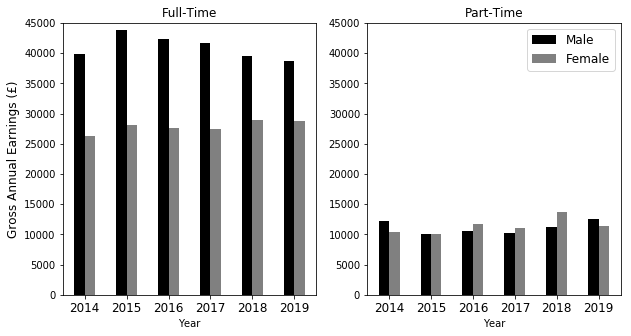

In [66]:
fig, all_axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

colours = ['k', 'grey']
bar_width = 0.25

sexes = ["Male", "Female"]
work_types = ["Full-Time", "Part-Time"]

for widx, work in enumerate(work_types):
    for yidx, year in enumerate(earnings_data['Year'].unique()):
        interested_data = earnings_data.loc[
            (
                earnings_data['WorkingPattern'] == work
            ) & (
                earnings_data['HoursAndEarnings'] == "Annual pay - Gross"
            ) & (
                earnings_data['Geography'] == "Swindon"
            ) & (
                earnings_data['Year'] == year
            ) & (
                earnings_data['AveragesAndPercentiles'] == "Mean"
            )
        ] 

        # Get and plot Full-Time annual salary
        val = interested_data.loc[interested_data['Sex'] == sexes[0]][['Figure']].iloc[0][0]
        ft = all_axs[widx].bar(
            year-(bar_width/2),
            val,
            color='k',
            width=bar_width,
            label="Full-Time"
        )

        # Get and plot Part-Time annual salary
        val = interested_data.loc[interested_data['Sex'] == sexes[1]][['Figure']].iloc[0][0]
        pt = all_axs[widx].bar(
            year+(bar_width/2),
            val,
            color='grey',
            width=bar_width,
            label="Part-Time"
        )

all_axs[0].set_title("Full-Time", fontsize=12)
all_axs[0].set_ylabel("Gross Annual Earnings (£)", fontsize=12)
all_axs[0].set_xticks(earnings_data['Year'].unique())
all_axs[0].set_xticklabels(earnings_data['Year'].unique(), fontsize=12)
all_axs[0].set_ylim([0, 45000])
all_axs[0].set_xlabel("Year")

all_axs[1].set_title("Part-Time", fontsize=12)
all_axs[1].set_xticks(earnings_data['Year'].unique())
all_axs[1].set_xticklabels(earnings_data['Year'].unique(), fontsize=12)
all_axs[1].set_ylim([0, 45000])
all_axs[1].set_xlabel("Year")
#all_axs.set_xlim(1, 5)

all_axs[widx].legend([ft, pt], sexes, fontsize=12, loc='upper right')

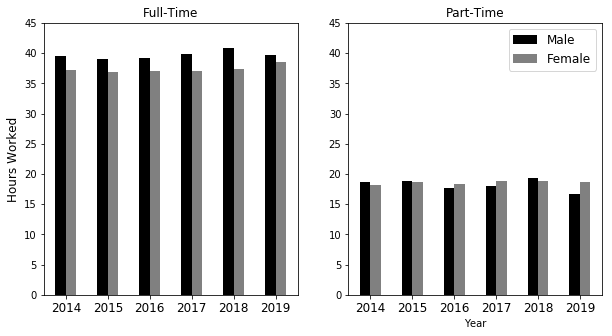

In [64]:
fig, all_axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

colours = ['k', 'grey']
bar_width = 0.25

sexes = ["Male", "Female"]
work_types = ["Full-Time", "Part-Time"]

for widx, work in enumerate(work_types):
    for yidx, year in enumerate(earnings_data['Year'].unique()):
        interested_data = earnings_data.loc[
            (
                earnings_data['WorkingPattern'] == work
            ) & (
                earnings_data['HoursAndEarnings'] == "Paid hours worked - Total"
            ) & (
                earnings_data['Geography'] == "Swindon"
            ) & (
                earnings_data['Year'] == year
            ) & (
                earnings_data['AveragesAndPercentiles'] == "Mean"
            )
        ] 

        # Get and plot Full-Time annual salary
        val = interested_data.loc[interested_data['Sex'] == sexes[0]][['Figure']].iloc[0][0]
        ft = all_axs[widx].bar(
            year-(bar_width/2),
            val,
            color='k',
            width=bar_width,
            label="Full-Time"
        )

        # Get and plot Part-Time annual salary
        val = interested_data.loc[interested_data['Sex'] == sexes[1]][['Figure']].iloc[0][0]
        pt = all_axs[widx].bar(
            year+(bar_width/2),
            val,
            color='grey',
            width=bar_width,
            label="Part-Time"
        )

all_axs[0].set_title("Full-Time", fontsize=12)
all_axs[0].set_ylabel("Hours Worked", fontsize=12)
all_axs[0].set_xticks(earnings_data['Year'].unique())
all_axs[0].set_xticklabels(earnings_data['Year'].unique(), fontsize=12)
all_axs[0].set_ylim([0, 45])
all_axs[1].set_xlabel("Year")


all_axs[1].set_title("Part-Time", fontsize=12)
all_axs[1].set_xticks(earnings_data['Year'].unique())
all_axs[1].set_xticklabels(earnings_data['Year'].unique(), fontsize=12)
all_axs[1].set_ylim([0, 45])
all_axs[1].set_xlabel("Year")
#all_axs.set_xlim(1, 5)

all_axs[widx].legend([ft, pt], sexes, fontsize=12, loc='upper right')